In [125]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

In [126]:
Hermite_Points=[
    [x,np.sin(x)+np.random.normal(0,0.1), 1] for x in np.linspace(0,5,5)
]

In [127]:
def H0(t):
    return 1-3*t**2+2*t**3

def H1(t):
    return 3*t**2-2*t**3

def H2(t):
    return t-2*t**2+t**3

def H3(t):
    return -t**2+t**3

def scale_01(x, x0, x1):
    return (x-x0)/(x1-x0)

def piecewisefunctions(points):
    functions=[]
    for i in range(len(points)-1):
        x0, y0, dy0 = points[i]
        x1, y1, dy1 = points[i+1]
        
        def f(x,x0,y0,dy0,x1,y1,dy1):
            t=scale_01(x,x0,x1)
            h=x1-x0
            return H0(t)*y0+H1(t)*y1+H2(t)*h*dy0+H3(t)*h*dy1

        f=partial(f,x0=x0,y0=y0,dy0=dy0,x1=x1,y1=y1,dy1=dy1)

        functions.append([x0,x1,f])

    return functions

def cubic_spline(x,points):
    functions=piecewisefunctions(points)
   
    for [x0,x1,f] in functions:
        if x0<=x<=x1:
            return f(x)



In [128]:
cubic_spline(0,Hermite_Points) 

-0.1765903694126929

In [129]:
x = np.linspace(-1, 6, 200)

f_spline = [cubic_spline(x,Hermite_Points) for x in x]

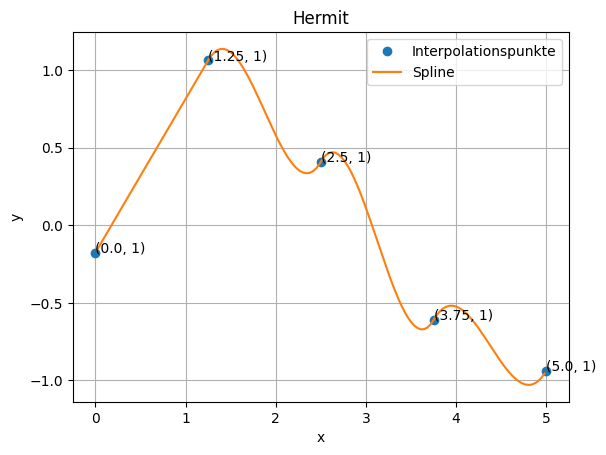

In [130]:

plt.plot([i[0] for i in Hermite_Points],[i[1] for i in Hermite_Points],'o')

#write point values in plot
for i in Hermite_Points:
    plt.text(i[0],i[1],"("+str(i[0])+", "+str(i[2])+")")

plt.plot(x,f_spline)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Interpolationspunkte','Spline'])
plt.grid()

plt.title('Hermit')
plt.show()

#Based on Lagrange interpolation

In [131]:
LagrangePoints=[
    [x,np.sin(x)+np.random.normal(0,0.1)] for x in np.linspace(0,5,5)
]
yPrime0=-1
yPrimeN=0
h=5/4

In [132]:
M = np.zeros((len(LagrangePoints)-2,len(LagrangePoints)-2))

# create bidianal matrix
for i in range(len(LagrangePoints)-2):
    M[i,i]=4
    M[i-1,i]=1
    M[i,i-1]=1

b = np.zeros(len(LagrangePoints)-2)

b[0]=LagrangePoints[2][1]-LagrangePoints[0][1]-h/3*yPrime0
b[-1]=LagrangePoints[-1][1]-LagrangePoints[-3][1]-h/3*yPrimeN

for i in range(1,len(b)-2):
    b[i]=LagrangePoints[i+1][1]-LagrangePoints[i-1][1]

b*=3/h

derivatives=[]
derivatives.append(yPrime0)
derivatives.extend(np.linalg.solve(M,b))
derivatives.append(yPrimeN)

newHermitPoints=[
    [LagrangePoints[i][0],LagrangePoints[i][1],derivatives[i]] for i in range(len(LagrangePoints))
]

In [133]:
x = np.linspace(-1, 6, 200)

f_spline = [cubic_spline(x,newHermitPoints) for x in x]

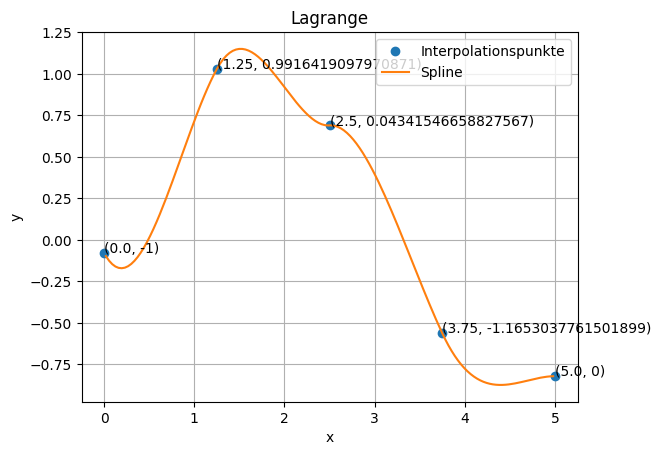

In [134]:

plt.plot([i[0] for i in newHermitPoints],[i[1] for i in newHermitPoints],'o')

for i in newHermitPoints:
    plt.text(i[0],i[1],"("+str(i[0])+", "+str(i[2])+")")

plt.plot(x,f_spline)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Interpolationspunkte','Spline'])
plt.grid()

plt.title('Lagrange')
plt.show()